In [6]:
import csv
import pandas
import statistics

# Remove Duplicates

Remove any duplicates that appear when scraping the data from Youtube. Probably an issue with the scraping script. 

In [9]:
videosdata = pandas.read_csv('channeldata.csv')
print(videosdata.iloc[1]['ThumbnailURL'])

seen = []
result = []
dups =0
for itemnum in videosdata.index:
    if itemnum != 0:
        if videosdata.iloc[itemnum]["ThumbnailURL"] not in seen:
            result.append(videosdata.iloc[itemnum])
            seen.append(videosdata.iloc[itemnum]['ThumbnailURL'])
        else:
            dups +=1

print(f"num of duplicates: {dups} out of {itemnum} items.")

with open("correcteddata.csv", 'a', encoding="utf-8", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['ChannelID', 'ChannelName', 'Title', 'Viewcount', 'ThumbnailURL', 'Time', 'Tags', 'Duration'])
    writer.writerows(result)

https://i.ytimg.com/vi/-QYAUXzYuE8/default.jpg
num of duplicates: 34880 out of 41075 items.


# Check for data loss after duplicates removed

Double check no data was lost when removing the duplicates.

In [10]:
list2 = pandas.read_csv('channelData.csv')
list1 = pandas.read_csv('correcteddata.csv')
print(list(set(list2).difference(list1)))

['Date']


# Create new file with Z-Scores

Calculate the zscores for each video. This takes into account only videos by the same creator and only the 7 videos either side (date wise) of the video in question. 

In [11]:
videosdata = pandas.read_csv('correcteddata.csv')
allzscores = []
for videoind in videosdata.index:
    curChannel = str(videosdata.iloc[videoind]['ChannelID'])
    curChanViews = videosdata.iloc[videoind]['Viewcount']
    surrounding = []

    forward = 8
    if videoind >= videosdata.shape[0] - 7 -1:
        forward = videosdata.shape[0]-1 - videoind
        
    for v in range(forward):
        surrounding.append(videosdata.iloc[videoind+v])
    a=7
    for v in range(7):
        surrounding.append(videosdata.iloc[videoind-a])
        a-=1
    
    surrounding = pandas.DataFrame(surrounding).reset_index(drop=True) # resets indexnummbers from original dataframe to up to date indexes
    
    todel = [] 
    for s in surrounding.index: # removes other channels from surrounding 7 videos
        urmum =str(surrounding.iloc[s]['ChannelID'])
        if urmum != curChannel: # if channel not the same
            todel.append(s)
    chansurround = surrounding.drop(index=todel).reset_index(drop=True)

    viewcounts = []
    for i in chansurround.index:
        viewcounts.append(chansurround.iloc[i]['Viewcount'])
    zscore = (curChanViews - statistics.mean(viewcounts)) / statistics.stdev(viewcounts)
    allzscores.append(zscore)

videosdata['Z-Score'] = allzscores
videosdata.to_csv('datazscores.csv')

# Thresholds

Adds a binary 'isGood' varibable if the z-score is over threshold

In [36]:
data = pandas.read_csv('datazscores.csv')
threshold = 0

for i in data.index:
    if data.iloc[i]['Z-Score'] > threshold:
        data.at[i,'isGood'] = 1
    else:
        data.at[i,'isGood'] = 0

data.to_csv(f'datathreshold{threshold}.csv')

In [ ]:
import random
data = pandas.read_csv('datathreshold1.csv')

isGood = 0
isBad = 1
for i in data['isGood']:
    if i == 0:
        isBad += 1
    elif i == 1:
        isGood += 1

new = []


if isGood < isBad:
    for i in data.index:
        if data.iloc[i]['isGood'] == 1:
            new.append(data.iloc[i])
            data.
else:
    print('more isBad than isGood')
            
data.sample(frac=1)

dataframe =  pandas.DataFrame({'Name': ['Good', 'Bad'], 'nu': [isGood, isBad]})


<AxesSubplot:ylabel='nu'>

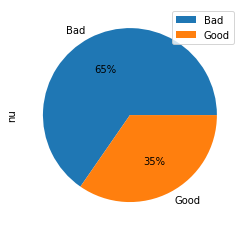

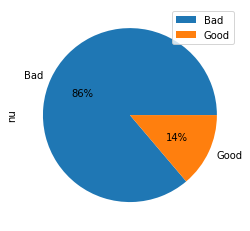

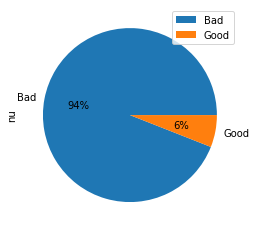

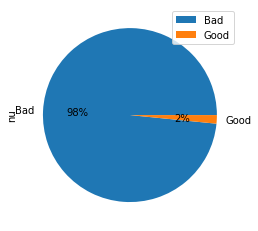

In [40]:
data = pandas.read_csv('datathreshold1.csv')
isGood = 0
isBad = 1
for i in data['isGood']:
    if i == 0:
        isBad += 1
    elif i == 1:
        isGood += 1
dataframe =  pandas.DataFrame({'Name': ['Good', 'Bad'], 'nu': [isGood, isBad]})

data2 = pandas.read_csv('datathreshold2.csv')
isGood = 0
isBad = 1
for i in data2['isGood']:
    if i == 0:
        isBad += 1
    elif i == 1:
        isGood += 1
dataframe2 =  pandas.DataFrame({'Name': ['Good', 'Bad'], 'nu': [isGood, isBad]})
print(isGood)

data3 = pandas.read_csv('datathreshold3.csv')
isGood = 0
isBad = 1
for i in data3['isGood']:
    if i == 0:
        isBad += 1
    elif i == 1:
        isGood += 1
dataframe3 =  pandas.DataFrame({'Name': ['Good', 'Bad'], 'nu': [isGood, isBad]})

data0 = pandas.read_csv('datathreshold0.csv')
isGood = 0
isBad = 1
for i in data0['isGood']:
    if i == 0:
        isBad += 1
    elif i == 1:
        isGood += 1
dataframe0 =  pandas.DataFrame({'Name': ['Good', 'Bad'], 'nu': [isGood, isBad]})

dataframe0.groupby(['Name']).sum().plot(kind='pie', autopct='%1.0f%%', y='nu')
dataframe.groupby(['Name']).sum().plot(kind='pie',  autopct='%1.0f%%',y='nu')
dataframe2.groupby(['Name']).sum().plot(kind='pie', autopct='%1.0f%%', y='nu')
dataframe3.groupby(['Name']).sum().plot(kind='pie', autopct='%1.0f%%', y='nu')